# Principal Component Analysis
- Refer to this [Noteboook](https://darkmortal.github.io/Jupyter-Notebooks/Mathematics/Matrix/Covariance%20Matrix.html) for detailed explanation of covariance matrix.
- Refer to this [Noteboook](https://darkmortal.github.io/Jupyter-Notebooks/Mathematics/Matrix/Eigen%20values%20&%20vectors.html) for detailed explanation of eigen-values and eigen-vectors.
## 1. Significance of covariance matrix in PCA
The covariance matrix is central to PCA because:
- **Capturing Variance**: The diagonal elements of the covariance matrix represent the variance of each individual variable. The off-diagonal elements show how pairs of variables vary together.
- **Identifying Directions of Maximum Variance**: PCA aims to find new, uncorrelated variables (principal components) that capture the maximum possible variance from the original data. The eigenvectors of the covariance matrix represent these principal component directions. The eigenvector corresponding to the largest eigenvalue points in the direction of the greatest variance in the data.
- **Dimensionality Reduction**: By ordering the principal components according to the magnitude of their corresponding eigenvalues (which represent the amount of variance explained by each component), PCA allows for effective dimensionality reduction. We can select a subset of principal components that capture most of the data's variance, discarding those that contribute less, thereby reducing the dimensionality while retaining as much information as possible.
## 2. Role in Principal Component Analysis (PCA)

In PCA, eigenvalues and eigenvectors are crucial for transforming data into a new coordinate system where the new axes (principal components) capture the most variance.

- **Eigenvectors as Principal Components**: The eigenvectors of the covariance matrix represent the **principal components**. These are new orthogonal axes in the feature space. Each eigenvector points in a direction of maximum variance of the data projected onto it.
- **Eigenvalues as Variance Magnitude**: The magnitude of each eigenvalue corresponds to the amount of variance in the dataset that is explained by its corresponding eigenvector (principal component). A larger eigenvalue indicates that its principal component captures more variance in the data.

## 3. Ordering of Principal Components

The principal components are ordered according to the magnitude of their corresponding eigenvalues. The eigenvector associated with the largest eigenvalue is the **first principal component (PC1)**, capturing the most significant amount of variance in the data. The eigenvector with the second largest eigenvalue is the **second principal component (PC2)**, and so on. This ordering highlights the importance of each principal component in explaining the total variance of the dataset, allowing for dimensionality reduction by selecting only the most significant components.

## 4. Orthogonality
A key property of eigenvectors derived from a symmetric matrix (like a covariance matrix) is that they are **orthogonal** to each other. This means that the principal components are perpendicular, ensuring that each component captures distinct, uncorrelated information about the data. This orthogonality is vital because it implies that the variance captured by one principal component is independent of the variance captured by another, making them powerful for data decorrelation and dimensionality reduction.
***
# Steps of the PCA Algorithm
- Calculate the covariance matrix.
- Calculate its eigen-values and eigen-vectors.
- `Pc1` is the eigen-vector corresponding to the largest eigen-value.
- `Pc2` is the eigen-vector corresponding to the second-largest eigen-value.
***


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Iris dataset loaded.")

Iris dataset loaded.


In [2]:
print("Original data shape:", X.shape)

# 3. Instantiate a StandardScaler object and fit it to X. Then transform X to standardize the data, storing the result in X_scaled.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)

# 5. Instantiate a PCA object, specifying n_components=2.
pca = PCA(n_components=2)

# 6. Fit the PCA model to the standardized data X_scaled and transform it, storing the result in X_pca.
X_pca = pca.fit_transform(X_scaled)

# 7. Print the shape of the original data (X_scaled.shape) and the shape of the PCA-transformed data (X_pca.shape).
print("PCA transformed data shape:", X_pca.shape)

# 8. Print the explained_variance_ratio_ attribute of the fitted PCA model.
print("Explained variance ratio of principal components:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())

Original data shape: (150, 4)
Scaled data shape: (150, 4)
PCA transformed data shape: (150, 2)
Explained variance ratio of principal components: [0.72962445 0.22850762]
Cumulative explained variance: 0.9581320720000165


## Visualization of `Scikit-learn` PCA Results


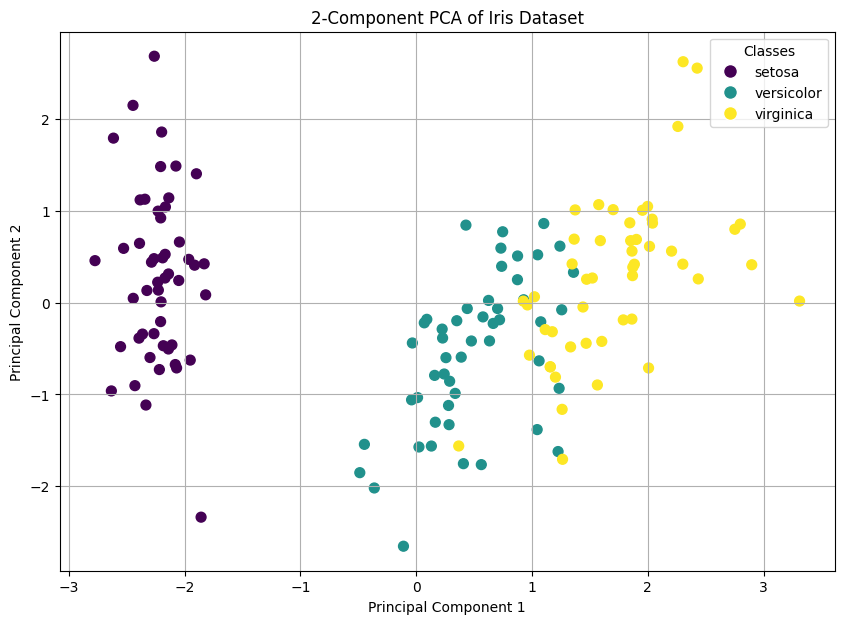

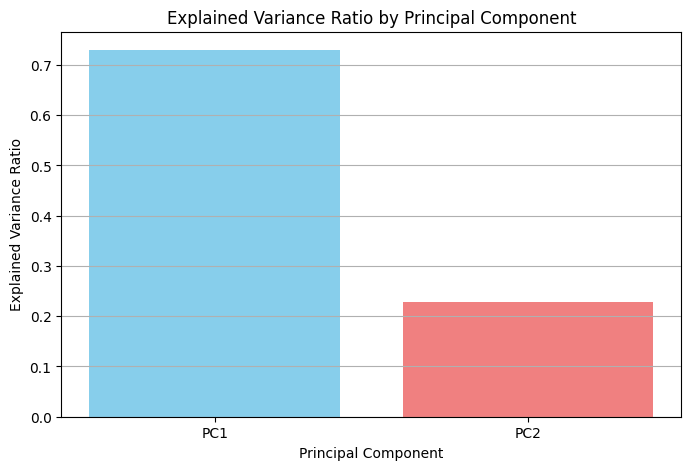

In [3]:
import matplotlib.pyplot as plt

# 1. Visualize the PCA-transformed data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)

# Create a legend with target names
legend_elements = []
for i, target_name in enumerate(iris.target_names):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=target_name,
                                      markerfacecolor=plt.cm.viridis(i / (len(iris.target_names) - 1)), markersize=10))
plt.legend(handles=legend_elements, title="Classes")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-Component PCA of Iris Dataset')
plt.grid(True)
plt.show()

# 2. Visualize explained variance ratio
plt.figure(figsize=(8, 5))
components = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(components, pca.explained_variance_ratio_, color=['skyblue', 'lightcoral'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(components, [f'PC{i}' for i in components])
plt.grid(axis='y')
plt.show()

## Custom implementation of PCA

In [4]:
import numpy as np
cov_mat = np.cov(X, y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

In [6]:
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [7]:
eigenvectors.real

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [8]:
import numpy as np

# Get the real part of the eigenvalues and sort them in descending order
real_eigenvalues = np.real(eigenvalues)
sorted_indices = np.argsort(real_eigenvalues)[::-1]

# Get the indices of the two largest eigenvalues
largest_two_indices = sorted_indices[:2]

print("Indices of the two largest eigenvalues:", largest_two_indices)

Indices of the two largest eigenvalues: [0 1]


In [9]:
pc1 = eigenvectors[:, largest_two_indices[0]].real
pc2 = eigenvectors[:, largest_two_indices[1]].real

print(pc1); print(pc2)

[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
[-0.65658877 -0.73016143  0.17337266  0.07548102]


## Visualization of custom PCA Results

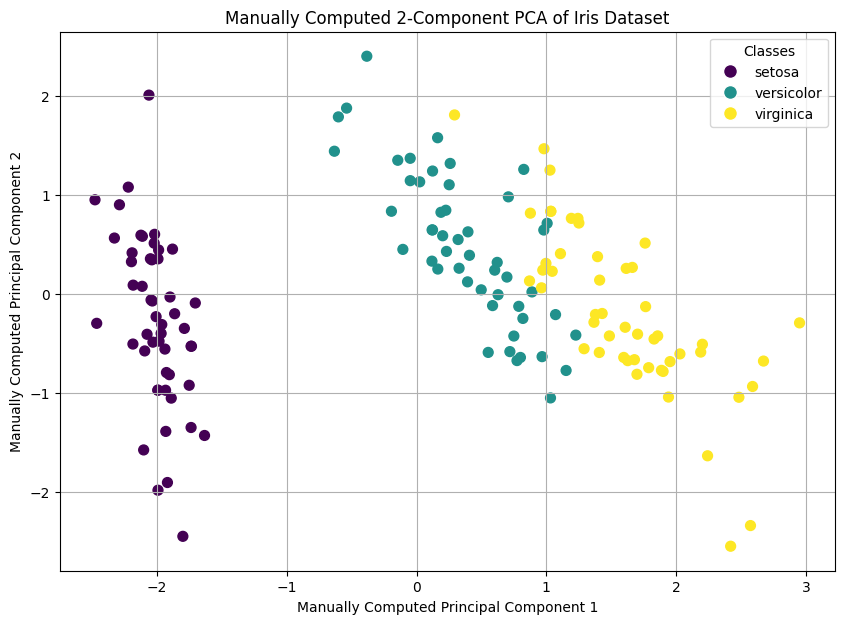

In [10]:
X1 = np.dot(X_scaled, pc1)
X2 = np.dot(X_scaled, pc2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X1, X2, c=y, cmap='viridis', s=50)

# Create a legend with target names
legend_elements = []
for i, target_name in enumerate(iris.target_names):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=target_name,
                                      markerfacecolor=plt.cm.viridis(i / (len(iris.target_names) - 1)), markersize=10))
plt.legend(handles=legend_elements, title="Classes")

plt.xlabel('Manually Computed Principal Component 1')
plt.ylabel('Manually Computed Principal Component 2')
plt.title('Manually Computed 2-Component PCA of Iris Dataset')
plt.grid(True)
plt.show()

***